<a href="https://colab.research.google.com/github/Analytic-Abdul/Transcribe-Audio-for-Free-with-Collab-and-Whisper/blob/main/Transcribing_Meeting%20Audio_with_OpenAI_Whisper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the Collab Notebook
---
Created By [Jason Boog](https://medium.com/@jasonboog)

OpenAI's Whisper is a general-purpose speech recognition model that you can use to transcribe or translate audio files. You can use Whisper for free on a GPU using this Google Colab notebook.

Thanks to ByteXD for [this video introduction](https://youtu.be/-KyqrwdTsN0).

For more information about Whisper, you can visit [this GitHub repository](https://github.com/openai/whisper).

Before we get started, save a copy of this Google Colab notebook to your Google Drive. Just open the File menu and choose "Save a Copy in Drive."

Open your copy of the Colab notebook on Google Chrome, and follow these steps to transcribe and translate.

# Step One: Install Dependencies
---


## Install Whisper

This step will install the latest commit from the OpenAI repository on Github. Just run the cell below to install.


In [5]:
!pip install git+https://github.com/openai/whisper.git

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-pj3g34vl
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-pj3g34vl
  Resolved https://github.com/openai/whisper.git to commit 517a43ecd132a2089d85f4ebc044728a71d49f6e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━

## Install ffmpeg
---

You need to install [ffmpeg](https://ffmpeg.org), a cross-platform solution to record, convert and stream audio and video. Just run the cell to install.

In [6]:
!sudo apt update && sudo apt install ffmpeg

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,649 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,306 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jamm

# Step Two: Import necessary libraries (os and whisper)
Import os and whisper.

1.   os so that you can manipulate the files in the machine's directory
2.   Whisper so that you can control how you transcribe/translate.
3.   mount google.colab drive so that you can save your work



In [7]:
# Import operating system to allow python run code on the OS and whisper library for transcription
import os
import whisper

In [ ]:
# This code will unmount the drive if it is already mounted and restart the runtime to refresh the session
from google.colab import drive

#Unmount the drive if it is already mounted.
try:
  drive.flush_and_unmount()
  print('Drive unmounted and runtime restarting...')
except ValueError:
  pass

#Restart the runtime (this will interrupt the current session)
get_ipython().system_raw("kill -9 -1") #This will restart the runtime in colab

# Remounting drive. Please authorize with your Google account when prompted.
drive.mount('/content/drive')
print('Drive mounted successfully!')

# Step Three: Upload Your File

Open the file folder on the left-hand corner of your Colab notebook. Drag the .mp3 you would like to transcribe into the "Files" section.

This will upload the audio to your your Google Drive. Here's what it looks like once you've uploaded a file:

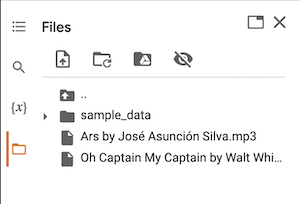




## Chop the Audio file into smaller bits (if necessary)

In [20]:
# Split the audio into 30-minute segments using ffmpeg
!ffmpeg -i "JANUARY 2025 EMC MEETING [In-person] - Audio.mp3" -f segment -segment_time 1800 -c copy "file_segment_%03d.mp3"

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [21]:
# Print out the list of files in the directory
print(os.listdir())

['.config', 'file_segment_001.mp3', 'file_segment_004.mp3', 'JANUARY 2025 EMC MEETING [In-person] - Audio.mp3', 'file_segment_002.mp3', 'file_segment_006.mp3', 'file_segment_003.mp3', 'file_segment_005.mp3', 'transcripts', 'file_segment_000.mp3', 'sample_data']


# Step Four: Transcribe

To transcribe an .mp3,  

1.   First you would need to create a folder to keep your transcripts
2.   Next, you need to  you simply copy and paste the title of your .mp3 file into the code cell below and run the cell.

Don't forget the quotation marks!

## Create the Directory into which the transcriptions will be saved.

In [22]:
# Confirm that the transcript directory exists, if not, create it.

if not os.path.exists("transcripts"):
    os.makedirs("transcripts")

## Start the transcription process proper

In [23]:
# Transcribe each segment using Whisper (medium model, English language)
for i in range(7):  # Adjust range if you have more than 10 segments
    segment_file = f"file_segment_{i:03d}.mp3"
    if os.path.exists(segment_file):
        !whisper "{segment_file}" --model medium --language en --output_dir transcripts

100%|█████████████████████████████████████| 1.42G/1.42G [00:20<00:00, 74.8MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/__init__.py:150: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this exper

In [24]:
# 6. Combine the transcriptions (if desired)

In [27]:
!zip -r /content/transcripts.zip /content/transcripts

  adding: content/transcripts/ (stored 0%)
  adding: content/transcripts/file_segment_006.json (deflated 84%)
  adding: content/transcripts/file_segment_005.json (deflated 81%)
  adding: content/transcripts/file_segment_006.txt (deflated 62%)
  adding: content/transcripts/file_segment_004.vtt (deflated 65%)
  adding: content/transcripts/file_segment_005.tsv (deflated 61%)
  adding: content/transcripts/file_segment_006.srt (deflated 69%)
  adding: content/transcripts/file_segment_003.srt (deflated 66%)
  adding: content/transcripts/file_segment_002.tsv (deflated 62%)
  adding: content/transcripts/file_segment_004.json (deflated 81%)
  adding: content/transcripts/file_segment_003.vtt (deflated 64%)
  adding: content/transcripts/file_segment_003.tsv (deflated 60%)
  adding: content/transcripts/file_segment_002.txt (deflated 62%)
  adding: content/transcripts/file_segment_001.txt (deflated 63%)
  adding: content/transcripts/file_segment_005.srt (deflated 66%)
  adding: content/transcripts/

In [29]:
from google.colab import files
files.download("/content/transcripts.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Step Five: Translate

To translate an .mp3, simply copy and paste the title of your .mp3 file into the command line below and run the cell.

You can change the language as needed in the command line, and English is the default output. Don't forget the quotation marks!

Note: I created and successfully ran every step of this notebook with my Colab Pro subscription.

On the basic Google Colab plan, all the steps worked except "Step Five." This final step kept getting a "Runtime discontinued" error on the basic plan.

In [25]:
# !whisper "librodepoemas_04_garcialorca.mp3" --task translate

# License

MIT License

Copyright (c) 2022 Jason Boog

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.